Bài tập

1. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
- Imange inverse transformation
- Gamma - Correction
- Log Transformation
- Histogram Equalization
- Contrast Streching
- Khi người dùng ấn phím I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục excercise. Lưu và hiển thị các ảnh đã biến đổi.

<>:89: SyntaxWarning: invalid escape sequence '\M'
<>:89: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Khương Tử\AppData\Local\Temp\ipykernel_16452\3242926137.py:89: SyntaxWarning: invalid escape sequence '\M'
  print("\MENU")


\MENU
I - Image Inverse Transformation
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
E - Thoát chương trình
Đã lưu ảnh: balloons_noisy_gamma.png


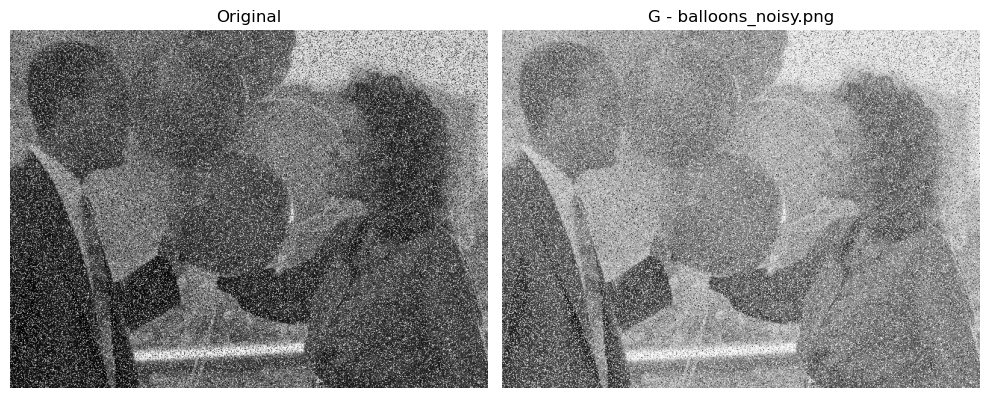

Đã lưu ảnh: bird_gamma.png


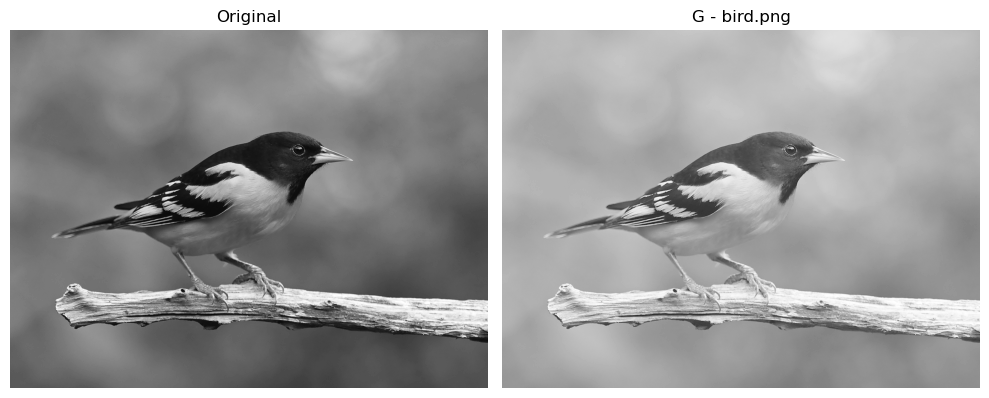

\MENU
I - Image Inverse Transformation
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
E - Thoát chương trình
Đã thoát chương trình.


In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

os.makedirs('output', exist_ok=True)

image_folder = 'exercise'
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.png')]

def inverse_image(img_array):
    return 255 - img_array

def gamma_correction(img_array, gamma=0.5):
    img_float = img_array.astype(float)
    img_norm = img_float / 255.0
    corrected = np.power(img_norm, gamma) * 255.0
    return corrected.astype(np.uint8)

def log_transformation(img_array):
    img_float = img_array.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return log_img.astype(np.uint8)

def histogram_equalization(img_array):
    flat = img_array.flatten()
    hist, _ = np.histogram(flat, bins=256, range=(0, 255))
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    eq_img = cdf_final[flat]
    return eq_img.reshape(img_array.shape)

def contrast_stretching(img_array):
    a = np.min(img_array)
    b = np.max(img_array)
    stretched = 255 * (img_array.astype(float) - a) / (b - a)
    return stretched.astype(np.uint8)

def display_images(original, transformed, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(original, cmap='gray')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title(title)
    plt.imshow(transformed, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def process_images(transformation, name):
    for filename in image_files:
        path = os.path.join(image_folder, filename)
        img = Image.open(path).convert('L')
        img_array = np.array(img)

        if transformation == 'I':
            result = inverse_image(img_array)
            method = 'inverse'
        elif transformation == 'G':
            result = gamma_correction(img_array)
            method = 'gamma'
        elif transformation == 'L':
            result = log_transformation(img_array)
            method = 'log'
        elif transformation == 'H':
            result = histogram_equalization(img_array)
            method = 'histeq'
        elif transformation == 'C':
            result = contrast_stretching(img_array)
            method = 'contrast'
        else:
            print("Phím không hợp lệ.")
            return

        output_name = f"{os.path.splitext(filename)[0]}_{method}.png"
        output_path = os.path.join('output', output_name)
        Image.fromarray(result).save(output_path)
        print(f"Đã lưu ảnh: {output_name}")

        display_images(img, result, f"{name} - {filename}")

def main():
    while True:
        print("\MENU")
        print("I - Image Inverse Transformation")
        print("G - Gamma Correction")
        print("L - Log Transformation")
        print("H - Histogram Equalization")
        print("C - Contrast Stretching")
        print("E - Thoát chương trình")
        key = input("Nhập lựa chọn (I/G/L/H/C/E): ").strip().upper()

        if key == 'E':
            print("Đã thoát chương trình.")
            break
        elif key in ['I', 'G', 'L', 'H', 'C']:
            process_images(key, key)
        else:
            print("Lựa chọn không hợp lệ.")

if __name__ == '__main__':
    main()


2. Viết chương trinh tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
- Fast Fourier
- Butterworth Lowpass Filter
- Butterworth Highpass Filter
- Khi người dùng ấn phìm F,L,H thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục excercise. Lưu và hiển thị các ảnh đã biến đổi.



MENU BIẾN ĐỔI ẢNH FOURIER
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
E - Thoát
✔ Đã lưu ảnh: balloons_noisy_Butterworth_High.png


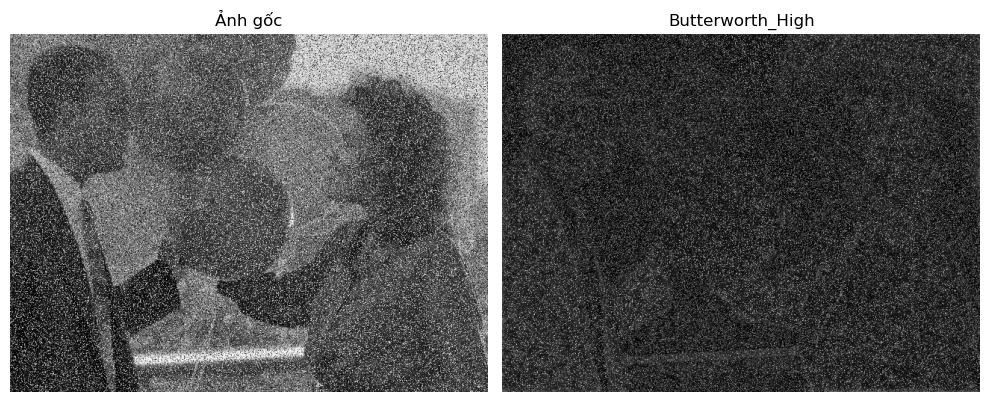

✔ Đã lưu ảnh: bird_Butterworth_High.png


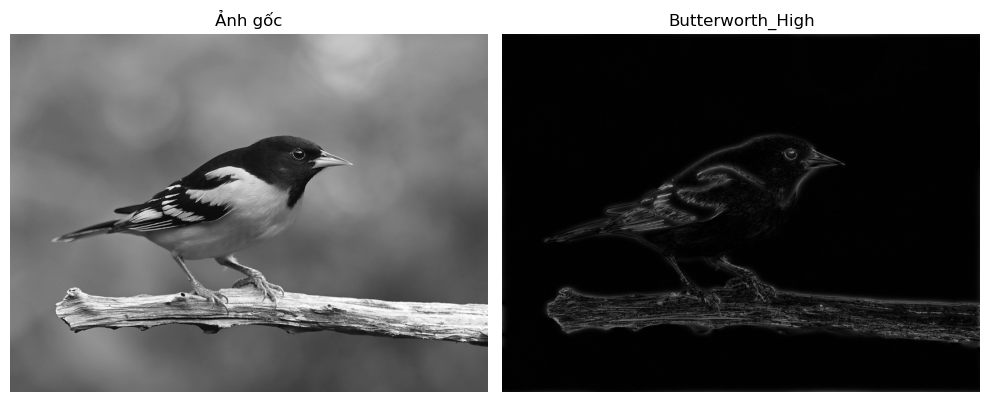

✔ Đã lưu ảnh: ha-long-bay-in-vietnam_Butterworth_High.png


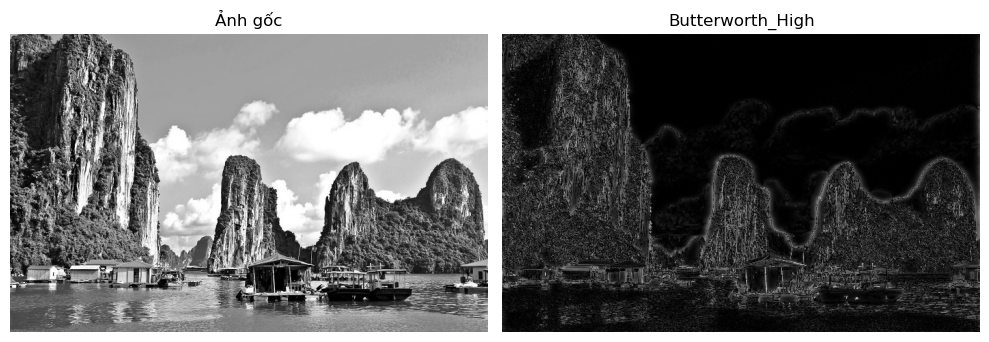

✔ Đã lưu ảnh: pagoda_Butterworth_High.png


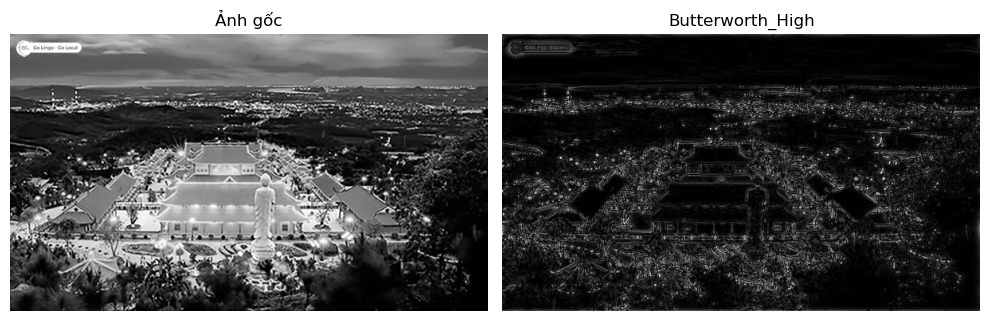

✔ Đã lưu ảnh: quang_ninh_Butterworth_High.png


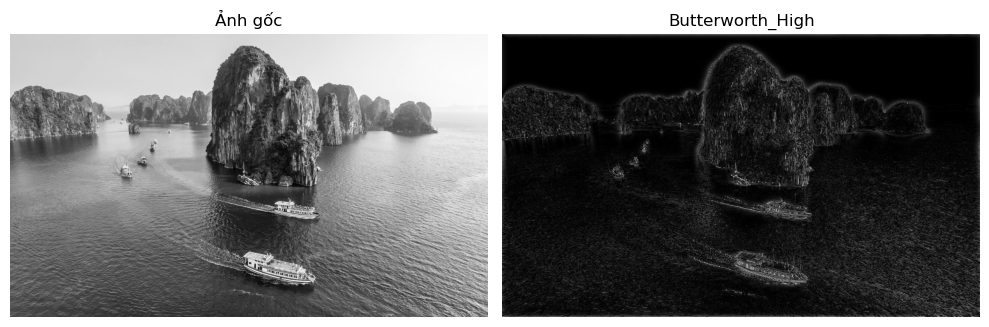


MENU BIẾN ĐỔI ẢNH FOURIER
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
E - Thoát
Đã thoát chương trình.


In [4]:
import os
import math
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

os.makedirs('output_fft', exist_ok=True)

thu_muc_anh = 'exercise'
ds_anh = [f for f in os.listdir(thu_muc_anh) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

def hienthi_anh(goc, bien_doi, tieu_de):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Ảnh gốc")
    plt.imshow(goc, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(tieu_de)
    plt.imshow(bien_doi, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def biendoi_fft(img_arr):
    F = np.abs(scipy.fftpack.fft2(img_arr))
    F_shift = scipy.fftpack.fftshift(F)
    F_log = np.log(1 + F_shift)
    F_norm = 255 * (F_log / np.max(F_log))
    return F_norm.astype(np.uint8)

def boloc_butterworthlow(img_arr, d0=30.0, bac=1):
    M, N = img_arr.shape
    F = scipy.fftpack.fft2(img_arr)
    F_shift = scipy.fftpack.fftshift(F)
    H = np.ones((M, N))
    for i in range(M):
        for j in range(N):
            D = math.sqrt((i - M/2)**2 + (j - N/2)**2)
            if D != 0:
                H[i, j] = 1 / (1 + (D / d0)**(2 * bac))
    G = F_shift * H
    G_ifft = np.abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(G)))
    return np.clip(G_ifft, 0, 255).astype(np.uint8)

def boloc_butterworthhigh(img_arr, d0=30.0, bac=1):
    M, N = img_arr.shape
    F = scipy.fftpack.fft2(img_arr)
    F_shift = scipy.fftpack.fftshift(F)
    H = np.ones((M, N))
    for i in range(M):
        for j in range(N):
            D = math.sqrt((i - M/2)**2 + (j - N/2)**2)
            if D != 0:
                H[i, j] = 1 / (1 + (d0 / D)**(2 * bac))
            else:
                H[i, j] = 0
    G = F_shift * H
    G_ifft = np.abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(G)))
    return np.clip(G_ifft, 0, 255).astype(np.uint8)

def xu_ly_anh(loai_bien_doi, ma_lenh):
    for ten in ds_anh:
        duong_dan = os.path.join(thu_muc_anh, ten)
        anh = Image.open(duong_dan).convert('L')
        mang = np.asarray(anh)

        if loai_bien_doi == 'F':
            ket_qua = biendoi_fft(mang)
            ten_phuong_phap = 'FFT'
        elif loai_bien_doi == 'L':
            ket_qua = boloc_butterworthlow(mang)
            ten_phuong_phap = 'Butterworth_Low'
        elif loai_bien_doi == 'H':
            ket_qua = boloc_butterworthhigh(mang)
            ten_phuong_phap = 'Butterworth_High'
        else:
            print("Lựa chọn không hợp lệ.")
            return

        ten_luu = f"{os.path.splitext(ten)[0]}_{ten_phuong_phap}.png"
        duong_dan_luu = os.path.join('output_fft', ten_luu)
        Image.fromarray(ket_qua).save(duong_dan_luu)
        print(f"✔ Đã lưu ảnh: {ten_luu}")
        hienthi_anh(anh, ket_qua, ten_phuong_phap)

def menu_chinh():
    while True:
        print("\nMENU BIẾN ĐỔI ẢNH FOURIER")
        print("F - Fast Fourier Transform")
        print("L - Butterworth Lowpass Filter")
        print("H - Butterworth Highpass Filter")
        print("E - Thoát")
        lua_chon = input("Nhập lựa chọn (F/L/H/E): ").strip().upper()

        if lua_chon == 'E':
            print("Đã thoát chương trình.")
            break
        elif lua_chon in ['F', 'L', 'H']:
            xu_ly_anh(lua_chon, lua_chon)
        else:
            print("⚠ Lựa chọn không hợp lệ!")

if __name__ == '__main__':
    menu_chinh()


3. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục excercise và sử dụng ngẫu nhiên một trong các phép biển đỏi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi

✔ Đã lưu ảnh: balloons_noisy_RBG_contrast.png


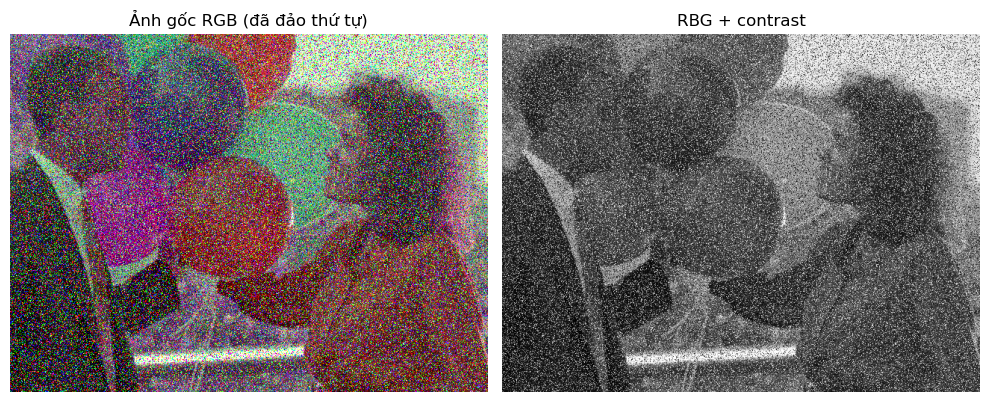

✔ Đã lưu ảnh: bird_BGR_histeq.png


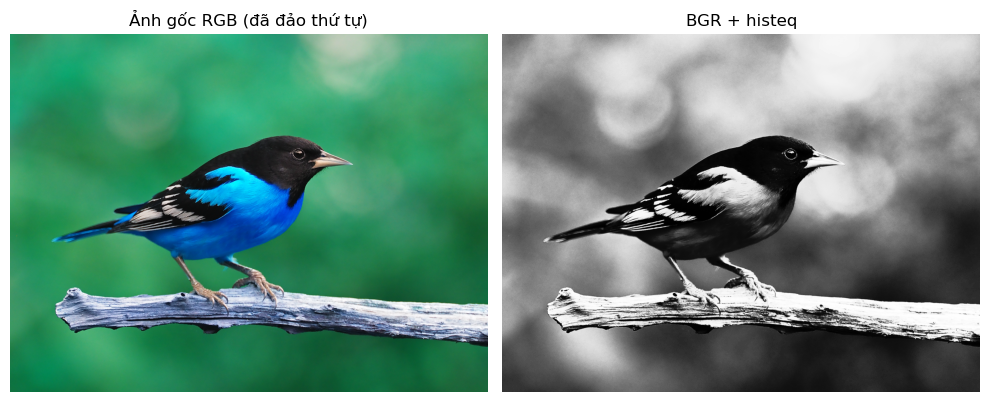

In [5]:
import os
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

os.makedirs('output_rgb', exist_ok=True)

image_folder = 'exercise'
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.png')]

def inverse_image(img_array):
    return 255 - img_array

def gamma_correction(img_array, gamma=0.5):
    img_float = img_array.astype(float)
    img_norm = img_float / 255.0
    corrected = np.power(img_norm, gamma) * 255.0
    return corrected.astype(np.uint8)

def log_transformation(img_array):
    img_float = img_array.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return log_img.astype(np.uint8)

def histogram_equalization(img_array):
    flat = img_array.flatten()
    hist, _ = np.histogram(flat, bins=256, range=(0, 255))
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    eq_img = cdf_final[flat]
    return eq_img.reshape(img_array.shape)

def contrast_stretching(img_array):
    a = np.min(img_array)
    b = np.max(img_array)
    stretched = 255 * (img_array.astype(float) - a) / (b - a)
    return stretched.astype(np.uint8)

def shuffle_rgb(img_array):
    order = list(range(3))
    random.shuffle(order)
    return img_array[..., order], ''.join('RGB'[i] for i in order)

def apply_random_transformation(gray_img):
    transforms = ['I', 'G', 'L', 'H', 'C']
    choice = random.choice(transforms)

    if choice == 'I':
        result = inverse_image(gray_img)
        method = 'inverse'
    elif choice == 'G':
        result = gamma_correction(gray_img)
        method = 'gamma'
    elif choice == 'L':
        result = log_transformation(gray_img)
        method = 'log'
    elif choice == 'H':
        result = histogram_equalization(gray_img)
        method = 'histeq'
    elif choice == 'C':
        result = contrast_stretching(gray_img)
        method = 'contrast'
    return result, method

def display_images(original, transformed, title):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Ảnh gốc RGB (đã đảo thứ tự)")
    plt.imshow(original)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(transformed, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def process_rgb_images():
    for filename in image_files:
        path = os.path.join(image_folder, filename)
        img = Image.open(path).convert('RGB')
        img_array = np.array(img)

        shuffled_img_array, order_name = shuffle_rgb(img_array)

        gray_img = Image.fromarray(shuffled_img_array).convert('L')
        gray_array = np.array(gray_img)

        transformed_img, method = apply_random_transformation(gray_array)

        output_name = f"{os.path.splitext(filename)[0]}_{order_name}_{method}.png"
        output_path = os.path.join('output_rgb', output_name)
        Image.fromarray(transformed_img).save(output_path)

        print(f"✔ Đã lưu ảnh: {output_name}")
        display_images(Image.fromarray(shuffled_img_array), transformed_img, f"{order_name} + {method}")

if __name__ == '__main__':
    process_rgb_images()


4. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục excercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trng câu 2. Nếu ngẫu nhiên là phép Butterworth Lowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass thì chọn thêm Max Filter để lọc ảnh. Lưu và hiển thị ảnh đã biến đổi.

✔ Đã lưu ảnh: balloons_noisy_RBG_ButterworthHigh_Max.png


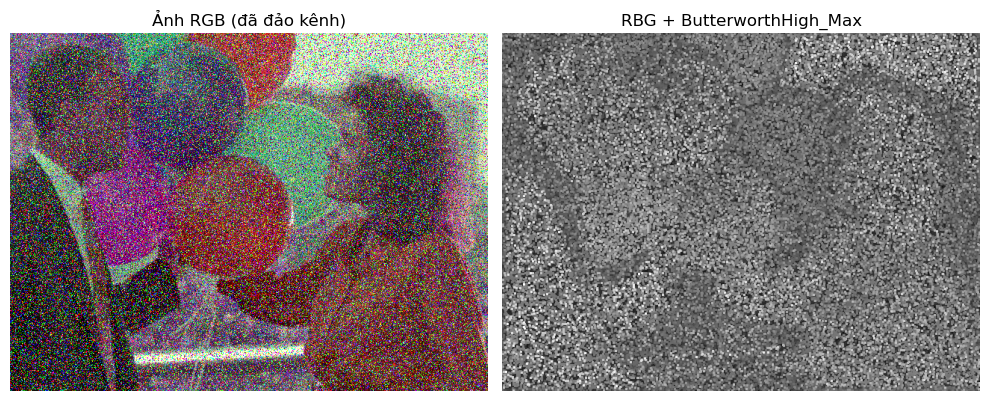

✔ Đã lưu ảnh: bird_GRB_ButterworthHigh_Max.png


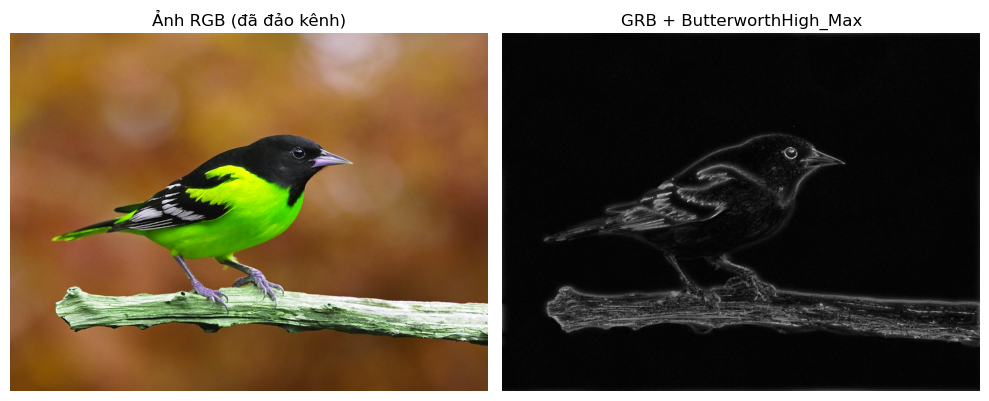

✔ Đã lưu ảnh: ha-long-bay-in-vietnam_BGR_ButterworthLow_Min.png


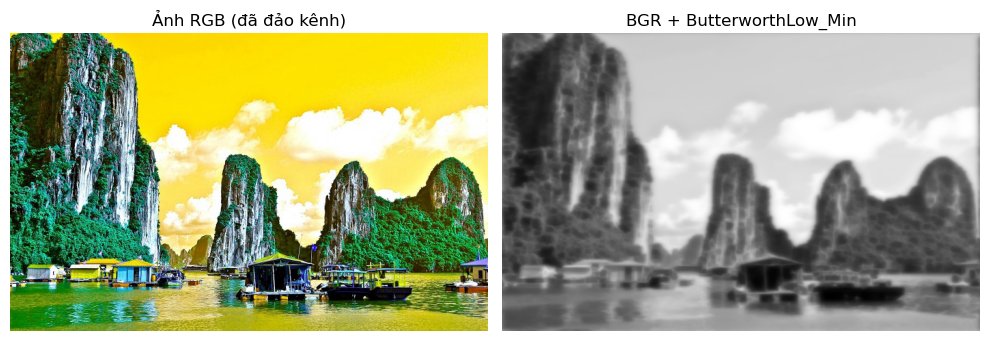

✔ Đã lưu ảnh: pagoda_BGR_ButterworthHigh_Max.png


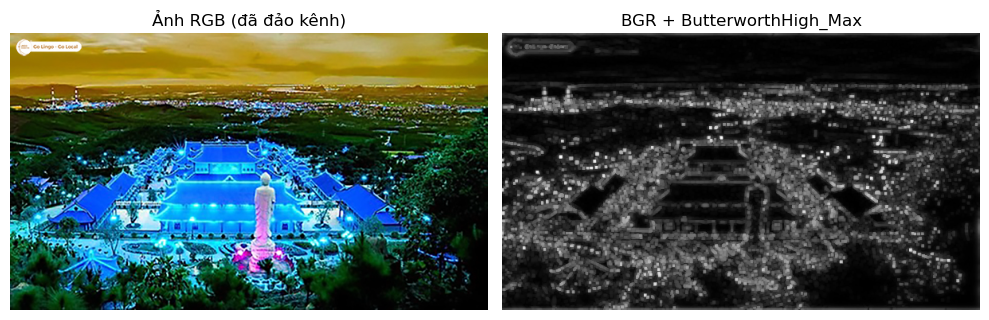

✔ Đã lưu ảnh: quang_ninh_RGB_ButterworthLow_Min.png


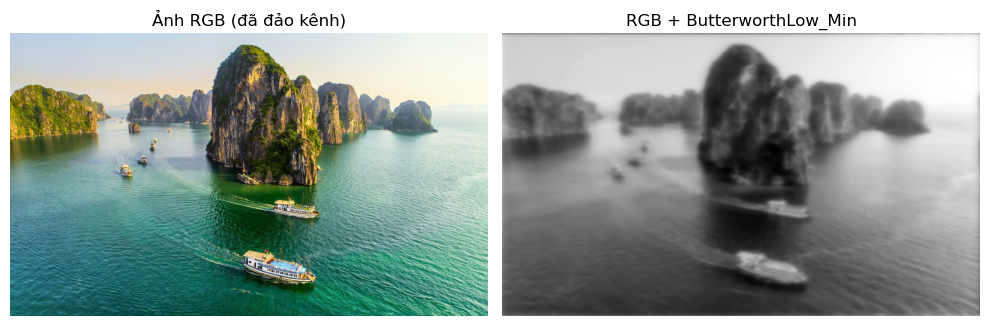

In [6]:
import os
import math
import numpy as np
import random
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import scipy.fftpack

os.makedirs('output_fft_rgb', exist_ok=True)

image_folder = 'exercise'
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

def hienthi_anh(goc, bien_doi, tieu_de):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Ảnh RGB (đã đảo kênh)")
    plt.imshow(goc)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(tieu_de)
    plt.imshow(bien_doi, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def biendoi_fft(img_arr):
    F = np.abs(scipy.fftpack.fft2(img_arr))
    F_shift = scipy.fftpack.fftshift(F)
    F_log = np.log(1 + F_shift)
    F_norm = 255 * (F_log / np.max(F_log))
    return F_norm.astype(np.uint8)

def boloc_butterworthlow(img_arr, d0=30.0, bac=1):
    M, N = img_arr.shape
    F = scipy.fftpack.fft2(img_arr)
    F_shift = scipy.fftpack.fftshift(F)
    H = np.ones((M, N))
    for i in range(M):
        for j in range(N):
            D = math.sqrt((i - M/2)**2 + (j - N/2)**2)
            if D != 0:
                H[i, j] = 1 / (1 + (D / d0)**(2 * bac))
    G = F_shift * H
    G_ifft = np.abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(G)))
    return np.clip(G_ifft, 0, 255).astype(np.uint8)

def boloc_butterworthhigh(img_arr, d0=30.0, bac=1):
    M, N = img_arr.shape
    F = scipy.fftpack.fft2(img_arr)
    F_shift = scipy.fftpack.fftshift(F)
    H = np.ones((M, N))
    for i in range(M):
        for j in range(N):
            D = math.sqrt((i - M/2)**2 + (j - N/2)**2)
            if D != 0:
                H[i, j] = 1 / (1 + (d0 / D)**(2 * bac))
            else:
                H[i, j] = 0
    G = F_shift * H
    G_ifft = np.abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(G)))
    return np.clip(G_ifft, 0, 255).astype(np.uint8)

def shuffle_rgb(img_array):
    order = list(range(3))
    random.shuffle(order)
    return img_array[..., order], ''.join('RGB'[i] for i in order)

def process_rgb_fft_images():
    for filename in image_files:
        path = os.path.join(image_folder, filename)
        img = Image.open(path).convert('RGB')
        img_array = np.array(img)

        shuffled_rgb, rgb_order = shuffle_rgb(img_array)
        shuffled_img = Image.fromarray(shuffled_rgb)

        gray_img = shuffled_img.convert('L')
        gray_array = np.array(gray_img)

        methods = ['F', 'L', 'H']
        method = random.choice(methods)

        if method == 'F':
            result_array = biendoi_fft(gray_array)
            method_name = 'FFT'

        elif method == 'L':
            lowpassed = boloc_butterworthlow(gray_array)
            min_filtered = Image.fromarray(lowpassed).filter(ImageFilter.MinFilter(size=3))
            result_array = np.array(min_filtered)
            method_name = 'ButterworthLow_Min'

        elif method == 'H':
            highpassed = boloc_butterworthhigh(gray_array)
            max_filtered = Image.fromarray(highpassed).filter(ImageFilter.MaxFilter(size=3))
            result_array = np.array(max_filtered)
            method_name = 'ButterworthHigh_Max'

        output_name = f"{os.path.splitext(filename)[0]}_{rgb_order}_{method_name}.png"
        output_path = os.path.join('output_fft_rgb', output_name)
        Image.fromarray(result_array).save(output_path)

        print(f"✔ Đã lưu ảnh: {output_name}")
        hienthi_anh(shuffled_img, result_array, f"{rgb_order} + {method_name}")

if __name__ == '__main__':
    process_rgb_fft_images()
